In [16]:
import pandas as pd

# Use raw string format (r"...") to avoid backslash issues
file_path = r"C:\Users\Dakshith\Downloads\Online Retail.xlsx"

# Load only first 2000 rows to avoid slow loading
df = pd.read_excel(file_path, sheet_name="Online Retail", nrows=2000)

# Check if file loaded correctly
print(df.head())
print(df.info())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  

In [17]:
print(df.isnull().sum())

InvoiceNo        0
StockCode        0
Description      6
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID     533
Country          0
dtype: int64


In [22]:
df.dropna(subset=['Description'],inplace=True)

In [29]:
df['CustomerID'] = df['CustomerID'].fillna(-1)
df['Description'] = df['Description'].fillna("Unknown")
print(df['CustomerID'].isnull().sum())


0


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
sorted_Quantity = df.sort_values(by='Quantity',ascending=False)
print(sorted_Quantity[['Description','Quantity']].head(10)) 

                         Description  Quantity
730           NAMASTE SWAGAT INCENSE       600
870         BLACK RECORD COVER FRAME       480
181    FAIRY TALE COTTAGE NIGHTLIGHT       432
182    RED TOADSTOOL LED NIGHT LIGHT       432
219  DISCO BALL CHRISTMAS DECORATION       288
728        RED RETROSPOT OVEN GLOVE        200
179   LIGHT GARLAND BUTTERFILES PINK       192
180       WOODEN OWLS LIGHT GARLAND        192
178                    CHILLI LIGHTS       192
877           CHRISTMAS GINGHAM STAR       144


In [33]:
sorted_UnitPrice = df.sort_values(by='UnitPrice',ascending=False)
print(sorted_UnitPrice[['Description','UnitPrice']].head(10)) 

                             Description  UnitPrice
1814                      DOTCOM POSTAGE     569.77
246   RUSTIC  SEVENTEEN DRAWER SIDEBOARD     165.00
1665        CHALKBOARD KITCHEN ORGANISER      51.02
1423                            CARRIAGE      50.00
431             IVORY EMBROIDERED QUILT       35.75
294             IVORY EMBROIDERED QUILT       35.75
1677         BREAD BIN DINER STYLE IVORY      34.00
141                             Discount      27.50
1664              TRAY, BREAKFAST IN BED      25.49
1929          VICTORIAN SEWING BOX LARGE      25.49


In [36]:
high_Quantity = df[df['Quantity']>10]
print(high_Quantity.head())

   InvoiceNo StockCode                      Description  Quantity  \
9     536367     84879    ASSORTED COLOUR BIRD ORNAMENT        32   
26    536370     22728        ALARM CLOCK BAKELIKE PINK        24   
27    536370     22727        ALARM CLOCK BAKELIKE RED         24   
28    536370     22726       ALARM CLOCK BAKELIKE GREEN        12   
29    536370     21724  PANDA AND BUNNIES STICKER SHEET        12   

           InvoiceDate  UnitPrice  CustomerID         Country  
9  2010-12-01 08:34:00       1.69          -1  United Kingdom  
26 2010-12-01 08:45:00       3.75          -1          France  
27 2010-12-01 08:45:00       3.75          -1          France  
28 2010-12-01 08:45:00       3.75          -1          France  
29 2010-12-01 08:45:00       0.85          -1          France  


In [39]:
cheap_items = df[df['UnitPrice']>1]
print(cheap_items[['Description','Quantity']].head())

                           Description  Quantity
0   WHITE HANGING HEART T-LIGHT HOLDER         6
1                  WHITE METAL LANTERN         6
2       CREAM CUPID HEARTS COAT HANGER         8
3  KNITTED UNION FLAG HOT WATER BOTTLE         6
4       RED WOOLLY HOTTIE WHITE HEART.         6


In [40]:
uk_customers = df[df['Country']=='United Kingdom']
print(uk_customers.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55          -1  United Kingdom  
1 2010-12-01 08:26:00       3.39          -1  United Kingdom  
2 2010-12-01 08:26:00       2.75          -1  United Kingdom  
3 2010-12-01 08:26:00       3.39          -1  United Kingdom  
4 2010-12-01 08:26:00       3.39          -1  United Kingdom  


In [45]:
top_uk = df[(df['Country']=='United Kingdom') & (df['Quantity'] > 50)]
top_uk_sorted = top_uk.sort_values(by='Quantity',ascending=False)
print(top_uk_sorted.head())

    InvoiceNo StockCode                      Description  Quantity  \
730    536437     17021           NAMASTE SWAGAT INCENSE       600   
870    536477     21137         BLACK RECORD COVER FRAME       480   
182    536387     21731    RED TOADSTOOL LED NIGHT LIGHT       432   
181    536387     22466    FAIRY TALE COTTAGE NIGHTLIGHT       432   
219    536390     20668  DISCO BALL CHRISTMAS DECORATION       288   

            InvoiceDate  UnitPrice  CustomerID         Country  
730 2010-12-01 12:12:00       0.24          -1  United Kingdom  
870 2010-12-01 12:27:00       3.39          -1  United Kingdom  
182 2010-12-01 09:58:00       1.25          -1  United Kingdom  
181 2010-12-01 09:58:00       1.45          -1  United Kingdom  
219 2010-12-01 10:19:00       0.10          -1  United Kingdom  


In [46]:
country_sales = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
print(country_sales)

Country
United Kingdom    15392
Norway             1852
France              449
EIRE                243
Germany             117
Australia           107
Netherlands          97
Name: Quantity, dtype: int64


In [48]:
product_avg_price = df.groupby('Description')['UnitPrice'].mean().sort_values(ascending=False)
print(product_avg_price.head(10))

Description
DOTCOM POSTAGE                        569.77
RUSTIC  SEVENTEEN DRAWER SIDEBOARD    165.00
CHALKBOARD KITCHEN ORGANISER           51.02
CARRIAGE                               50.00
IVORY EMBROIDERED QUILT                35.75
BREAD BIN DINER STYLE IVORY            34.00
Discount                               27.50
WOODEN CROQUET GARDEN SET              25.49
CERAMIC CAKE STAND + HANGING CAKES     21.23
RED RETROSPOT ROUND CAKE TINS          21.23
Name: UnitPrice, dtype: float64


In [49]:
invoice_qty= df.groupby('InvoiceNo')['UnitPrice'].sum().sort_values(ascending=False)
print(invoice_qty.head(10))

InvoiceNo
536544    2987.72
536401     207.04
536412     187.46
536392     183.99
536528     157.26
536464     155.98
536520     153.30
536409     143.76
536522     143.69
536539     134.65
Name: UnitPrice, dtype: float64


In [51]:
combo_group = df.groupby(['Country','Description'])['Quantity'].sum()
print(combo_group.head(10))

Country    Description                    
Australia  ALARM CLOCK BAKELIKE GREEN          4
           ALARM CLOCK BAKELIKE RED            4
           BLACK/BLUE POLKADOT UMBRELLA        3
           BLUE DINER WALL CLOCK               2
           CHRISTMAS LIGHTS 10 REINDEER        6
           IVORY DINER WALL CLOCK              2
           LARGE HEART MEASURING SPOONS       24
           RED DINER WALL CLOCK                2
           RED RETROSPOT UMBRELLA              6
           SET OF 3 COLOURED  FLYING DUCKS     6
Name: Quantity, dtype: int64


In [52]:
combo_group = df.groupby(['Country','Description'])['Quantity'].sum()
print(combo_group)

Country         Description                     
Australia       ALARM CLOCK BAKELIKE GREEN           4
                ALARM CLOCK BAKELIKE RED             4
                BLACK/BLUE POLKADOT UMBRELLA         3
                BLUE DINER WALL CLOCK                2
                CHRISTMAS LIGHTS 10 REINDEER         6
                                                    ..
United Kingdom  YELLOW GIANT GARDEN THERMOMETER      1
                YOU'RE CONFUSING ME METAL SIGN       6
                YULETIDE IMAGES GIFT WRAP SET        2
                ZINC METAL HEART DECORATION         15
                ZINC WILLIE WINKIE  CANDLE STICK     4
Name: Quantity, Length: 1159, dtype: int64


In [55]:
grouped_df= df.groupby('Country')['Quantity'].sum().reset_index()
print(grouped_df.head(10))

          Country  Quantity
0       Australia       107
1            EIRE       243
2          France       449
3         Germany       117
4     Netherlands        97
5          Norway      1852
6  United Kingdom     15392


In [56]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

Description
NAMASTE SWAGAT INCENSE             600
BLACK RECORD COVER FRAME           480
RED TOADSTOOL LED NIGHT LIGHT      470
FAIRY TALE COTTAGE NIGHTLIGHT      438
DISCO BALL CHRISTMAS DECORATION    314
JUMBO BAG RED RETROSPOT            255
PAPER CHAIN KIT 50'S CHRISTMAS     250
SMALL POPCORN HOLDER               231
PACK OF 72 RETROSPOT CAKE CASES    229
HAND WARMER SCOTTY DOG DESIGN      229
Name: Quantity, dtype: int64


In [61]:
pivot1 = df.pivot_table(
    values='Quantity',
    index='Country',
    columns='Description',
    aggfunc='sum',
    fill_value=0
)
print(pivot1.head())

Description   4 PURPLE FLOCK DINNER CANDLES   SET 2 TEA TOWELS I LOVE LONDON   \
Country                                                                         
Australia                                 0                                 0   
EIRE                                      0                                 0   
France                                    0                                24   
Germany                                   0                                 0   
Netherlands                               0                                 0   

Description  10 COLOUR SPACEBOY PEN  12 DAISY PEGS IN WOOD BOX  \
Country                                                          
Australia                         0                          0   
EIRE                              0                          0   
France                            0                          0   
Germany                           0                          0   
Netherlands                       0 

In [62]:
pivot2 = df.pivot_table(
    values='UnitPrice',
    index='Country',
    columns='Description',
    aggfunc='mean',
    fill_value=0
)
print(pivot2.head())

Description   4 PURPLE FLOCK DINNER CANDLES   SET 2 TEA TOWELS I LOVE LONDON   \
Country                                                                         
Australia                               0.0                              0.00   
EIRE                                    0.0                              0.00   
France                                  0.0                              2.95   
Germany                                 0.0                              0.00   
Netherlands                             0.0                              0.00   

Description  10 COLOUR SPACEBOY PEN  12 DAISY PEGS IN WOOD BOX  \
Country                                                          
Australia                       0.0                        0.0   
EIRE                            0.0                        0.0   
France                          0.0                        0.0   
Germany                         0.0                        0.0   
Netherlands                     0.0 

In [63]:
pivot3 = df.pivot_table(
    values='Quantity',
    index='InvoiceNo',
    columns='Description',
    aggfunc='sum',
    fill_value=0
)
print(pivot3.head())

Description   4 PURPLE FLOCK DINNER CANDLES   SET 2 TEA TOWELS I LOVE LONDON   \
InvoiceNo                                                                       
536365                                    0                                 0   
536366                                    0                                 0   
536367                                    0                                 0   
536368                                    0                                 0   
536369                                    0                                 0   

Description  10 COLOUR SPACEBOY PEN  12 DAISY PEGS IN WOOD BOX  \
InvoiceNo                                                        
536365                            0                          0   
536366                            0                          0   
536367                            0                          0   
536368                            0                          0   
536369                            0 

In [65]:
pivot1.to_excel(r"C:\Users\Dakshith\Desktop\pivot_country_product.xlsx")


In [7]:
import pandas as pd
df = pd.read_excel(r"C:\Users\Dakshith\Downloads\Online Retail.xlsx", nrows=2000)

df_customers = df[['CustomerID','Country']].drop_duplicates()

df_segment = pd.DataFrame({'Country':['United Kingdom','Germany','France'],'Customer_Segment':['Premium','Standard','Premium']})

customer_segmented = pd.merge(df_customers,df_segment,on='Country',how='left')
print(customer_segmented)


    CustomerID         Country Customer_Segment
0      17850.0  United Kingdom          Premium
1      13047.0  United Kingdom          Premium
2      12583.0          France          Premium
3      13748.0  United Kingdom          Premium
4      15100.0  United Kingdom          Premium
..         ...             ...              ...
68     14911.0            EIRE              NaN
69     16456.0  United Kingdom          Premium
70     17841.0  United Kingdom          Premium
71     12472.0         Germany         Standard
72     17346.0  United Kingdom          Premium

[73 rows x 3 columns]


In [9]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [11]:
merged_df = pd.merge(df_customers,df_segment ,on='Country',how='inner')
print(merged_df)

    CustomerID         Country Customer_Segment
0      17850.0  United Kingdom          Premium
1      13047.0  United Kingdom          Premium
2      12583.0          France          Premium
3      13748.0  United Kingdom          Premium
4      15100.0  United Kingdom          Premium
..         ...             ...              ...
64     15165.0  United Kingdom          Premium
65     16456.0  United Kingdom          Premium
66     17841.0  United Kingdom          Premium
67     12472.0         Germany         Standard
68     17346.0  United Kingdom          Premium

[69 rows x 3 columns]


In [12]:
merged_df = pd.merge(df_customers,df_segment ,on='Country',how='left')
print(merged_df)

    CustomerID         Country Customer_Segment
0      17850.0  United Kingdom          Premium
1      13047.0  United Kingdom          Premium
2      12583.0          France          Premium
3      13748.0  United Kingdom          Premium
4      15100.0  United Kingdom          Premium
..         ...             ...              ...
68     14911.0            EIRE              NaN
69     16456.0  United Kingdom          Premium
70     17841.0  United Kingdom          Premium
71     12472.0         Germany         Standard
72     17346.0  United Kingdom          Premium

[73 rows x 3 columns]


In [13]:
merged_df = pd.merge(df_customers,df_segment ,on='Country',how='right')
print(merged_df)

    CustomerID         Country Customer_Segment
0      17850.0  United Kingdom          Premium
1      13047.0  United Kingdom          Premium
2      13748.0  United Kingdom          Premium
3      15100.0  United Kingdom          Premium
4      15291.0  United Kingdom          Premium
..         ...             ...              ...
64     17841.0  United Kingdom          Premium
65     17346.0  United Kingdom          Premium
66     12662.0         Germany         Standard
67     12472.0         Germany         Standard
68     12583.0          France          Premium

[69 rows x 3 columns]


In [14]:
merged_df = pd.merge(df_customers,df_segment ,on='Country',how='outer')
print(merged_df)

    CustomerID         Country Customer_Segment
0      12431.0       Australia              NaN
1      14911.0            EIRE              NaN
2      12583.0          France          Premium
3      12662.0         Germany         Standard
4      12472.0         Germany         Standard
..         ...             ...              ...
68     14594.0  United Kingdom          Premium
69     15165.0  United Kingdom          Premium
70     16456.0  United Kingdom          Premium
71     17841.0  United Kingdom          Premium
72     17346.0  United Kingdom          Premium

[73 rows x 3 columns]


In [23]:
print(df.columns.tolist())

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [25]:
merged_df = pd.merge(df_customers,df_segment ,on='Country',how='outer')
print(merged_df.head())

   CustomerID    Country Customer_Segment
0     12431.0  Australia              NaN
1     14911.0       EIRE              NaN
2     12583.0     France          Premium
3     12662.0    Germany         Standard
4     12472.0    Germany         Standard


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_excel(r"C:\Users\Dakshith\Downloads\Online Retail.xlsx", nrows=2000)
df.columns = df.columns.str.strip().str.replace(" "," ").str.lower()
print(df,df.columns)

     invoiceno stockcode                          description  quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
1995    536551     22837           HOT WATER BOTTLE BABUSHKA          2   
1996    536551     22900      SET 2 TEA TOWELS I LOVE LONDON          1   
1997    536551     22174                           PHOTO CUBE         3   
1998    536551     22112           CHOCOLATE HOT WATER BOTTLE         1   
1999    536551     22895  SET OF 2 TEA TOWELS APPLE AND PEARS         1   

             invoicedate  unitprice  customerid         country  
0    2010-12-01 08:26:00       2.

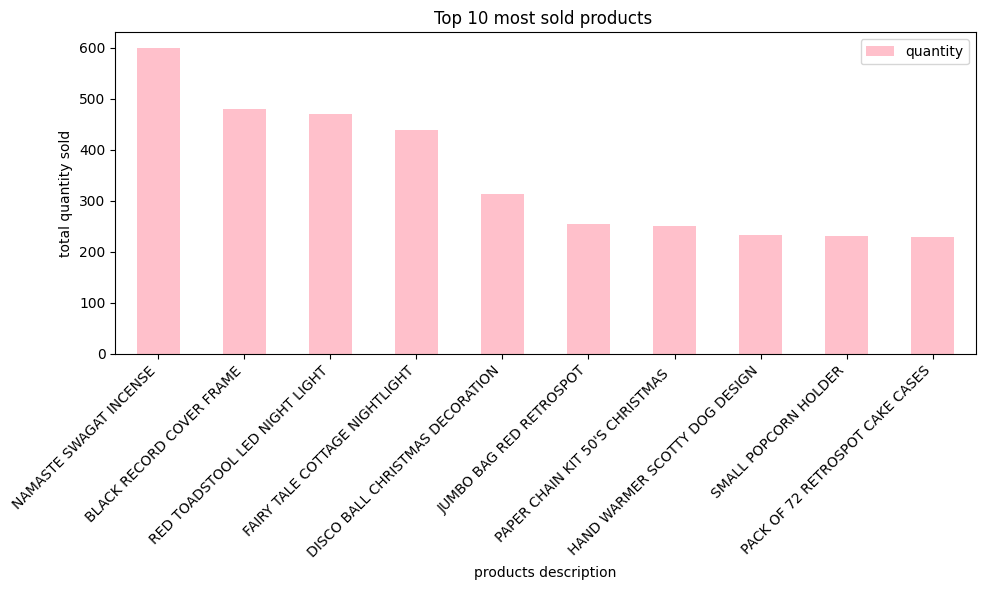

In [36]:
top_products = df.groupby('description')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='bar',color='pink')
plt.title('Top 10 most sold products ')
plt.xlabel('products description')
plt.ylabel('total quantity sold')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.legend()
plt.show()

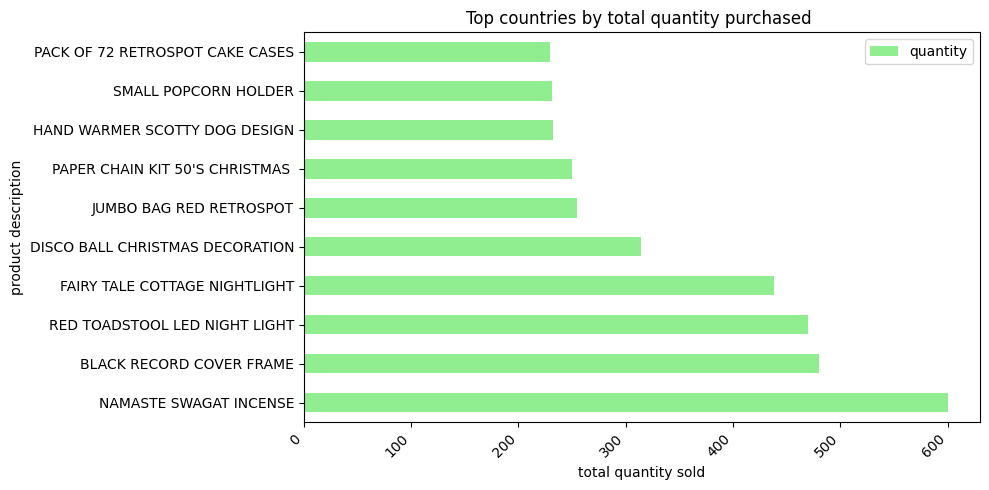

In [45]:
sales_country = df.groupby('country')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='barh',color='lightgreen')
plt.title('Top countries by total quantity purchased ')
plt.xlabel('total quantity sold')
plt.ylabel('product description')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.legend()
plt.show()

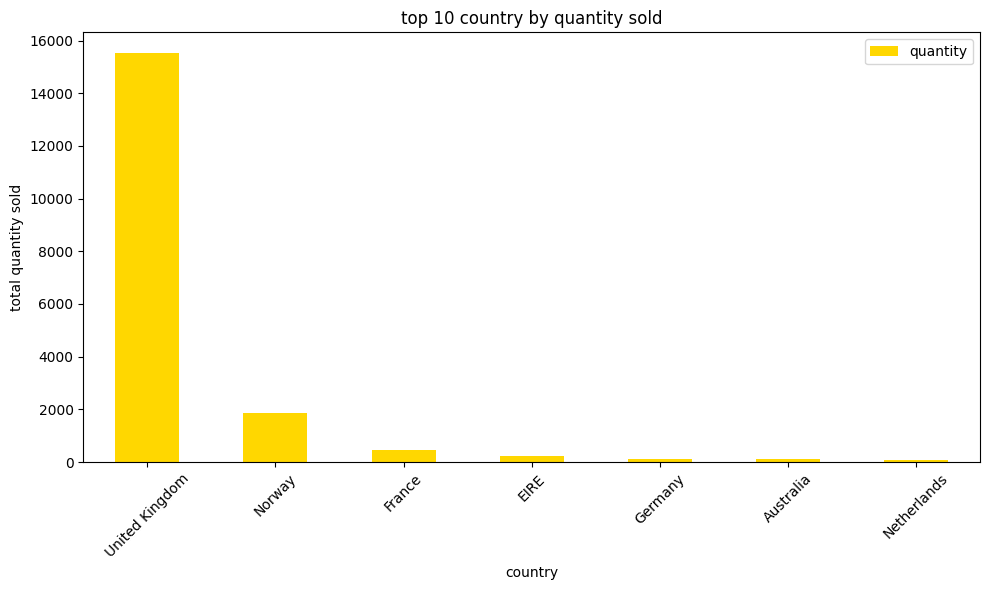

In [51]:
import matplotlib.pyplot as plt
country_sales = df.groupby('country')['quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
country_sales.plot(kind='bar',color='gold')
plt.title('top 10 country by quantity sold')
plt.xlabel('country')
plt.ylabel('total quantity sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

C:\Users\Dakshith\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


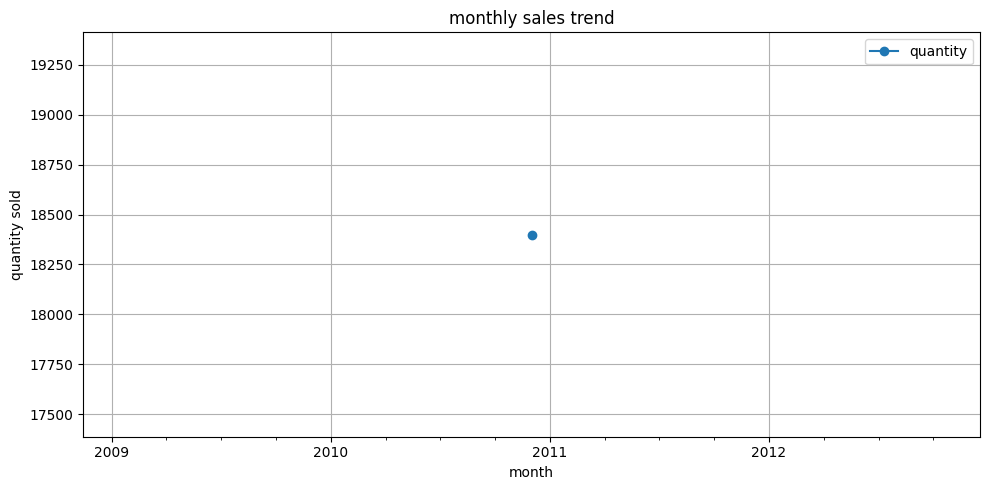

In [53]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

monthly_sales = df.set_index('invoicedate').resample('ME')['quantity'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title('monthly sales trend')
plt.xlabel('month')
plt.ylabel('quantity sold')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [55]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
print(df['invoicedate'])

0      2010-12-01 08:26:00
1      2010-12-01 08:26:00
2      2010-12-01 08:26:00
3      2010-12-01 08:26:00
4      2010-12-01 08:26:00
               ...        
1995   2010-12-01 14:34:00
1996   2010-12-01 14:34:00
1997   2010-12-01 14:34:00
1998   2010-12-01 14:34:00
1999   2010-12-01 14:34:00
Name: invoicedate, Length: 2000, dtype: datetime64[ns]


In [56]:
df['year'] = df['invoicedate'].dt.year
print(df['year'])

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
1995    2010
1996    2010
1997    2010
1998    2010
1999    2010
Name: year, Length: 2000, dtype: int32


In [59]:
print(df['year'].unique())

[2010]


In [73]:
df_filtered = df[(df['year'] >=2010) & (df['year'] <=2011)]
print(df_filtered)

     invoiceno stockcode                          description  quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
1995    536551     22837           HOT WATER BOTTLE BABUSHKA          2   
1996    536551     22900      SET 2 TEA TOWELS I LOVE LONDON          1   
1997    536551     22174                           PHOTO CUBE         3   
1998    536551     22112           CHOCOLATE HOT WATER BOTTLE         1   
1999    536551     22895  SET OF 2 TEA TOWELS APPLE AND PEARS         1   

             invoicedate  unitprice  customerid         country  year  sales  
0    2010-12-01 08:2

In [61]:
monthly_sales = df_filtered.set_index('invoicedate').resample('ME')['quantity'].sum()
print(monthly_sales)

invoicedate
2010-12-31    18400
Freq: ME, Name: quantity, dtype: int64


C:\Users\Dakshith\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


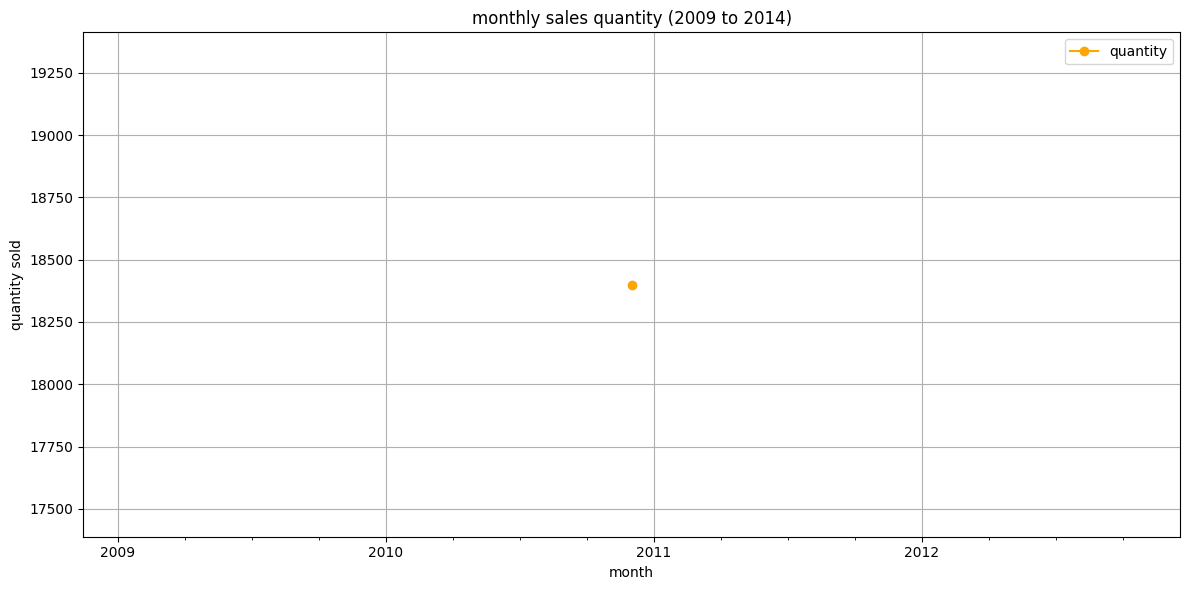

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o',linestyle='-',color='orange')
plt.title("monthly sales quantity (2009 to 2014)")
plt.xlabel("month")
plt.ylabel("quantity sold")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [67]:
df['quantity'] = pd.to_numeric(df['quantity'],errors='coerce')
df['unitprice'] = pd.to_numeric(df['unitprice'],errors='coerce')

df['sales'] = df['quantity'] * df['unitprice']
print(df['sales'])

0       15.30
1       20.34
2       22.00
3       20.34
4       20.34
        ...  
1995     9.30
1996     2.95
1997     4.95
1998     4.95
1999     2.95
Name: sales, Length: 2000, dtype: float64


In [68]:
print(df[['quantity','unitprice','sales']])

      quantity  unitprice  sales
0            6       2.55  15.30
1            6       3.39  20.34
2            8       2.75  22.00
3            6       3.39  20.34
4            6       3.39  20.34
...        ...        ...    ...
1995         2       4.65   9.30
1996         1       2.95   2.95
1997         3       1.65   4.95
1998         1       4.95   4.95
1999         1       2.95   2.95

[2000 rows x 3 columns]


0       15.30
1       20.34
2       22.00
3       20.34
4       20.34
        ...  
1995     9.30
1996     2.95
1997     4.95
1998     4.95
1999     2.95
Name: sales, Length: 2000, dtype: float64


C:\Users\Dakshith\AppData\Local\Temp\ipykernel_13584\2514229868.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_value = df_filtered['sales'].resample('M').sum()
C:\Users\Dakshith\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


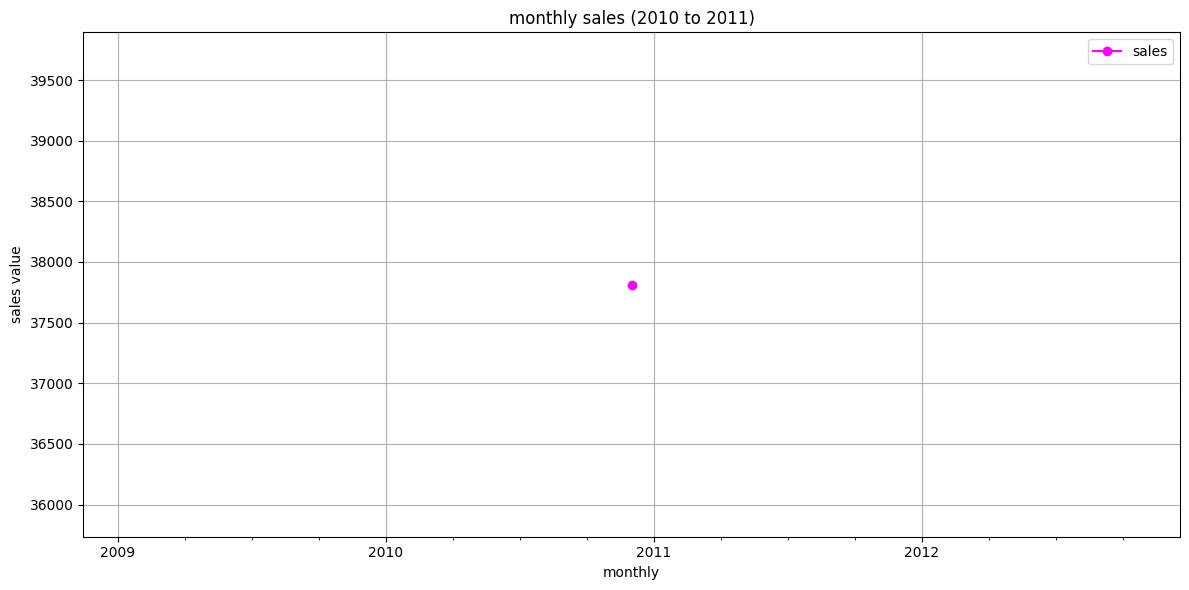

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel(r"C:\Users\Dakshith\Downloads\Online Retail.xlsx", nrows=2000)
df.columns = df.columns.str.strip().str.replace(" "," ").str.lower()
df['quantity'] = pd.to_numeric(df['quantity'],errors='coerce')
df['unitprice'] = pd.to_numeric(df['unitprice'],errors='coerce')

df['sales'] = df['quantity'] * df['unitprice']
print(df['sales'])

df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df['year'] = df['invoicedate'].dt.year

df_filtered = df[(df['year'] >=2010) & (df['year'] <=2011)]
df_filtered.set_index('invoicedate',inplace=True)


monthly_sales_value = df_filtered['sales'].resample('M').sum()
plt.figure(figsize=(12,6))
monthly_sales_value.plot(marker='o',color='magenta')
plt.title("monthly sales (2010 to 2011)")
plt.xlabel("monthly")
plt.ylabel("sales value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
print(df.columns.tolist())

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [31]:
print(df[['InvoiceDate','Quantity','UnitPrice']].head(10))

          InvoiceDate  Quantity  UnitPrice
0 2010-12-01 08:26:00         6       2.55
1 2010-12-01 08:26:00         6       3.39
2 2010-12-01 08:26:00         8       2.75
3 2010-12-01 08:26:00         6       3.39
4 2010-12-01 08:26:00         6       3.39
5 2010-12-01 08:26:00         2       7.65
6 2010-12-01 08:26:00         6       4.25
7 2010-12-01 08:28:00         6       1.85
8 2010-12-01 08:28:00         6       1.85
9 2010-12-01 08:34:00        32       1.69


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel(r"C:\Users\Dakshith\Downloads\Online Retail.xlsx", nrows=2000)
df.columns = df.columns.str.strip().str.replace(" "," ").str.lower()
print(df.columns)


Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')


In [37]:
df = df.dropna(subset=['quantity','country'])
print(df)

     invoiceno stockcode                          description  quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
1995    536551     22837           HOT WATER BOTTLE BABUSHKA          2   
1996    536551     22900      SET 2 TEA TOWELS I LOVE LONDON          1   
1997    536551     22174                           PHOTO CUBE         3   
1998    536551     22112           CHOCOLATE HOT WATER BOTTLE         1   
1999    536551     22895  SET OF 2 TEA TOWELS APPLE AND PEARS         1   

             invoicedate  unitprice  customerid         country  
0    2010-12-01 08:26:00       2.

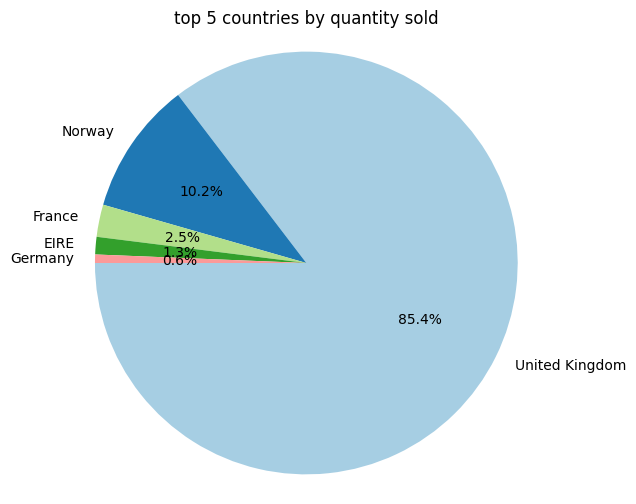

In [45]:
country_quantity = df.groupby('country')['quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(6,6))
plt.pie(country_quantity,labels=country_quantity.index,autopct='%1.1f%%',startangle=180,colors=plt.cm.Paired.colors[:5])
plt.title("top 5 countries by quantity sold")
plt.axis('equal')
plt.show()

([<matplotlib.patches.Wedge at 0x256506f9640>,
 [Text(0.9859361542734774, -0.4877805856083513, 'United Kingdom (15535)'),
  Text(-0.9084242001009231, 0.6202946660023752, 'Norway (1852)'),
  Text(-1.0776713240560332, 0.22050967622151374, 'France (449)'),
  Text(-1.09627177453317, 0.09048865322179674, 'EIRE (243)'),
  Text(-1.0997755699551224, 0.022219264836753468, 'Germany (117)')],
 [Text(0.5377833568764421, -0.2660621376045552, '85.4%'),
  Text(-0.495504109145958, 0.3383425450922046, '10.2%'),
  Text(-0.5878207222123816, 0.12027800521173475, '2.5%'),
  Text(-0.5979664224726381, 0.04935744721188912, '1.3%'),
  Text(-0.5998775836118849, 0.012119599001865527, '0.6%')])

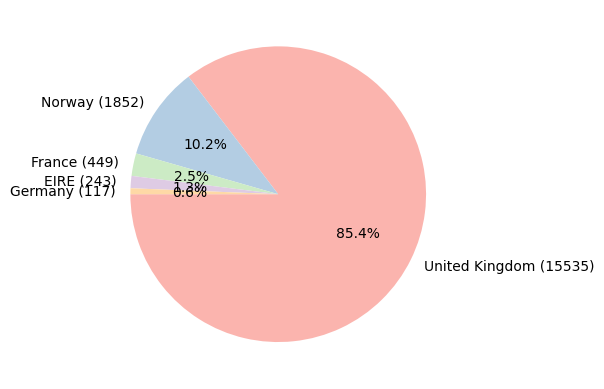

In [59]:
labels = [f'{country} ({int(qty)})' for country,qty in zip(country_quantity.index,country_quantity)]
plt.pie(country_quantity,labels=labels,autopct='%1.1f%%',startangle=180,colors=plt.cm.Pastel1.colors)

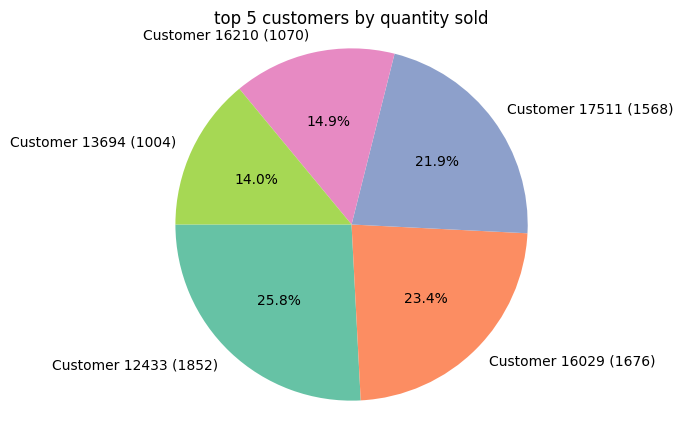

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel(r"C:\Users\Dakshith\Downloads\Online Retail.xlsx", nrows=2000)
df.columns = df.columns.str.strip().str.replace(" "," ").str.lower()


df = df.dropna(subset=['quantity','customerid'])


customer_quantity = df.groupby('customerid')['quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(5,5))
labels = [f'Customer {int(cid)} ({int(qty)})' for cid,qty in zip(customer_quantity.index,country_quantity)]
plt.pie(customer_quantity,labels=labels,autopct='%1.1f%%',startangle=180,colors=plt.cm.Set2.colors)
plt.title("top 5 customers by quantity sold")
plt.axis('equal')
plt.show()


In [67]:
df['sales'] = df['quantity']* df['unitprice']
print(df['sales'])

0       15.30
1       20.34
2       22.00
3       20.34
4       20.34
        ...  
1995     9.30
1996     2.95
1997     4.95
1998     4.95
1999     2.95
Name: sales, Length: 1467, dtype: float64


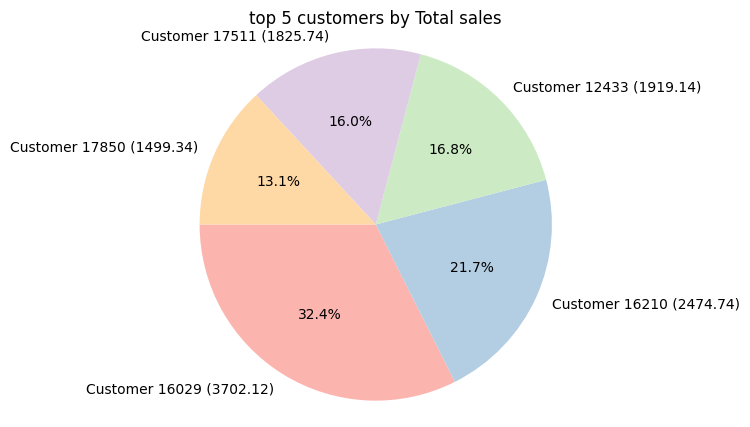

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel(r"C:\Users\Dakshith\Downloads\Online Retail.xlsx", nrows=2000)
df.columns = df.columns.str.strip().str.replace(" "," ").str.lower()


df = df.dropna(subset=['quantity','customerid','unitprice'])
df['quantity'] = pd.to_numeric(df['quantity'],errors='coerce')
df['unitprice'] = pd.to_numeric(df['unitprice'],errors='coerce')

df['sales'] = df['quantity']* df['unitprice']


customer_sales = df.groupby('customerid')['sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(5,5))
labels = [f'Customer {int(float(cid))} ({round(sale,2)})' for cid,sale in zip(customer_sales.index,customer_sales.values)]
plt.pie(customer_sales,labels=labels,autopct='%1.1f%%',startangle=180,colors=plt.cm.Pastel1.colors)
plt.title("top 5 customers by Total sales")
plt.axis('equal')
plt.show()

In [75]:
print(df.columns.tolist())

['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate', 'unitprice', 'customerid', 'country', 'sales']


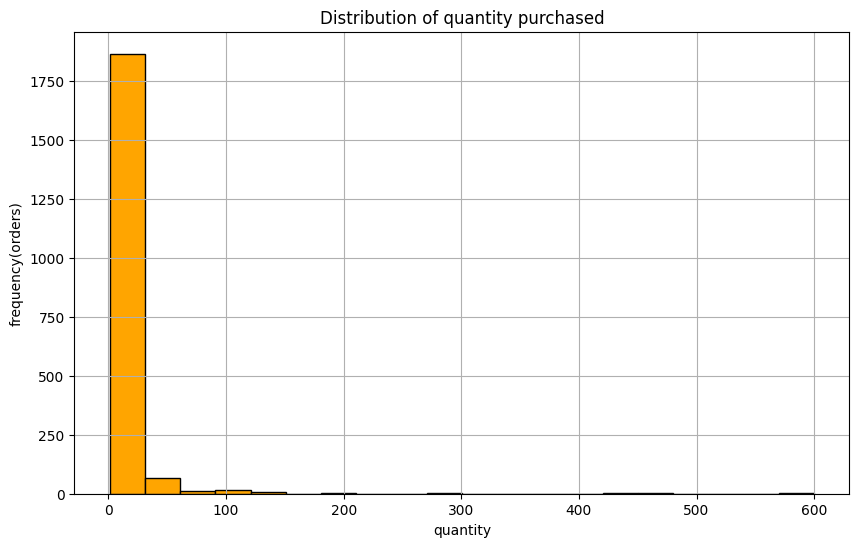

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel(r"C:\Users\Dakshith\Downloads\Online Retail.xlsx", nrows=2000)
df.columns = df.columns.str.strip().str.replace(" "," ").str.lower()


df = df.dropna(subset=['quantity'])
df = df[df['quantity']>0]


plt.figure(figsize=(10,6))
plt.hist(df['quantity'],bins=20,color='orange',edgecolor='black')
plt.title("Distribution of quantity purchased")
plt.xlabel("quantity")
plt.ylabel("frequency(orders)")
plt.grid(True)
plt.show()

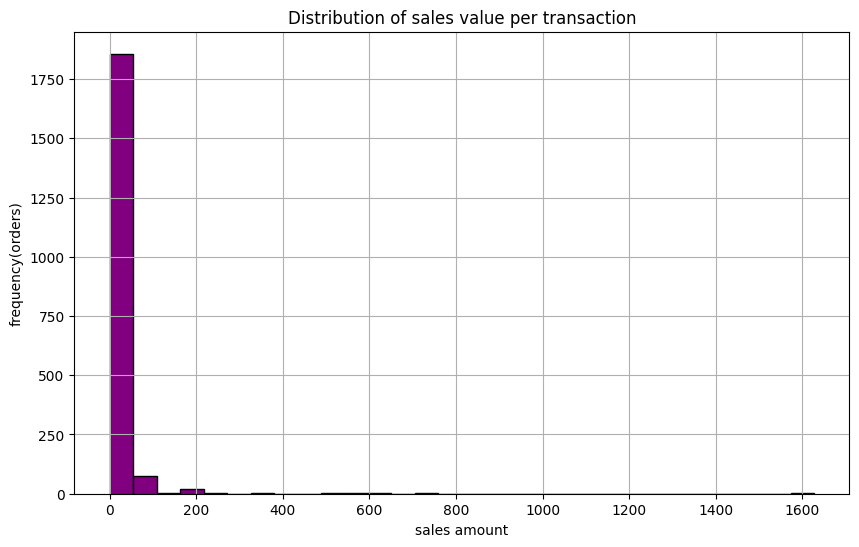

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel(r"C:\Users\Dakshith\Downloads\Online Retail.xlsx", nrows=2000)
df.columns = df.columns.str.strip().str.replace(" "," ").str.lower()


df['sales'] = df['quantity'] * df['unitprice']
df = df[df['sales']>0]


plt.figure(figsize=(10,6))
plt.hist(df['sales'],bins=30,color='purple',edgecolor='black')
plt.title("Distribution of sales value per transaction")
plt.xlabel("sales amount")
plt.ylabel("frequency(orders)")
plt.grid(True)
plt.show()

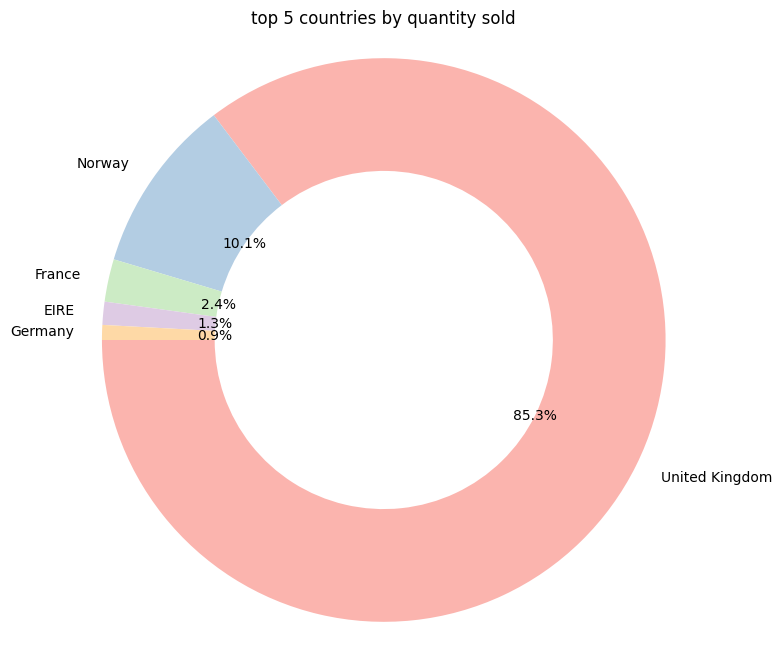

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel(r"C:\Users\Dakshith\Downloads\Online Retail.xlsx", nrows=2000)
df.columns = df.columns.str.strip().str.replace(" "," ").str.lower()


df = df.dropna(subset=['quantity','country'])
df = df[df['quantity']>0]




country_quantity= df.groupby('country')['quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,8))
wedges,texts,autotexts = plt.pie(country_quantity,labels=country_quantity.index,autopct='%1.1f%%',startangle=180,colors=plt.cm.Pastel1.colors,wedgeprops=dict(width=0.4))
plt.title("top 5 countries by quantity sold")
plt.axis('equal')
plt.show()

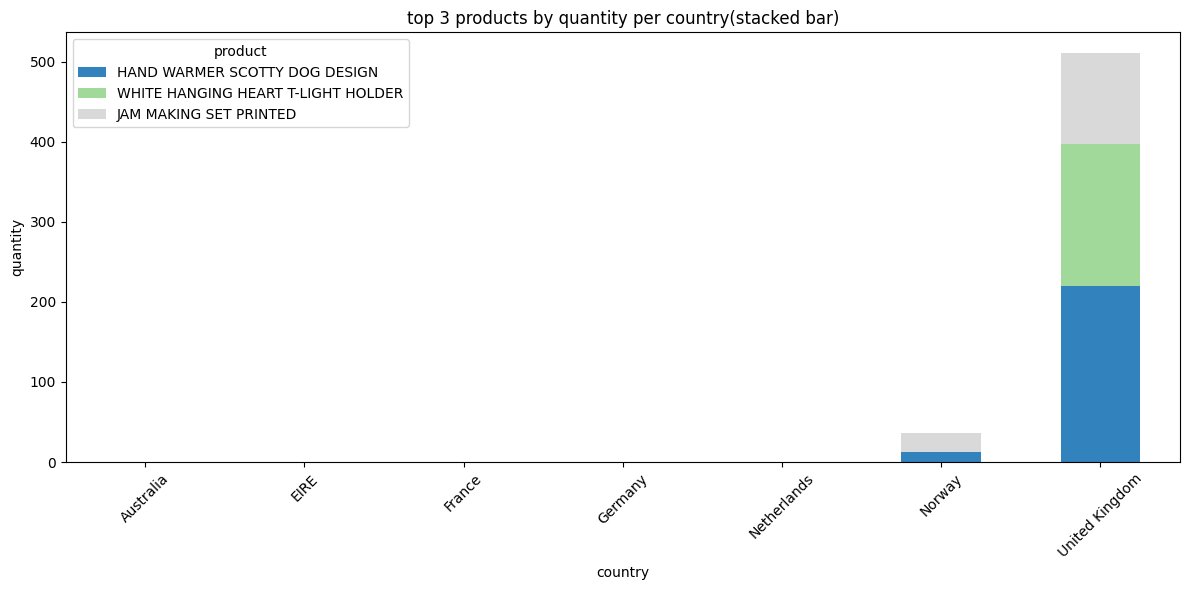

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel(r"C:\Users\Dakshith\Downloads\Online Retail.xlsx", nrows=2000)
df.columns = df.columns.str.strip().str.replace(" "," ").str.lower()


df = df.dropna(subset=['quantity','country','description'])
df = df[df['quantity']>0]

pivot_data = df.pivot_table(index='country',columns='description',values='quantity',aggfunc='sum',fill_value=0)

top_3_products = df['description'].value_counts().head(3).index.tolist()

stacked = pivot_data[top_3_products]

stacked.plot(kind='bar',stacked=True,figsize=(12,6),colormap='tab20c')
plt.title("top 3 products by quantity per country(stacked bar)")
plt.xlabel("country")
plt.ylabel("quantity")
plt.legend(title="product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

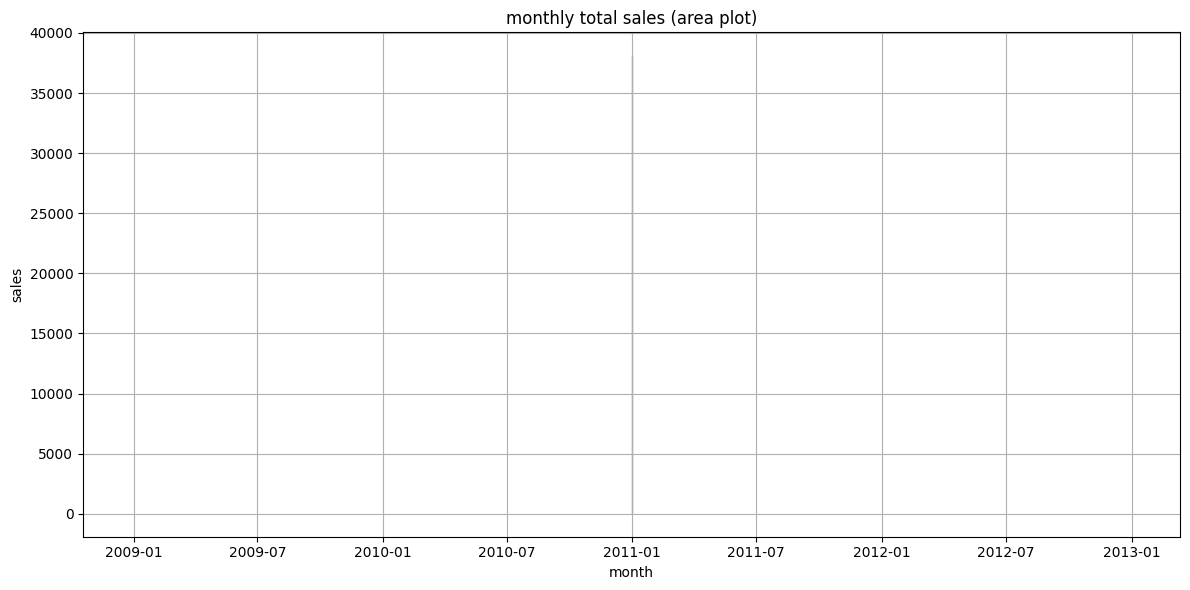

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel(r"C:\Users\Dakshith\Downloads\Online Retail.xlsx", nrows=2000)
df.columns = df.columns.str.strip().str.replace(" "," ").str.lower()

df= df.dropna(subset=['invoicedate','quantity','unitprice'])
df = df[(df['quantity']>0) & (df['unitprice']>0)]

df['invoicedate'] = pd.to_datetime(df['invoicedate'],errors='coerce')
df= df.dropna(subset=['invoicedate'])

df['sales'] = df['quantity'] * df['unitprice']
df.set_index('invoicedate',inplace=True)


monthly_sales = df['sales'].resample('ME').sum().sort_index()
if not monthly_sales.empty and monthly_sales.sum()>0:

    plt.figure(figsize=(12,6))
    plt.fill_between(monthly_sales.index,monthly_sales.values,color='purple',alpha=0.6)
    plt.plot(monthly_sales.index,monthly_sales.values,color='green')
    plt.title("monthly total sales (area plot)")
    plt.xlabel("month")
    plt.ylabel("sales")
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print("sales data is empty.nothing to plot")


In [115]:
print(df['sales'].head())

invoicedate
2010-12-01 08:26:00    15.30
2010-12-01 08:26:00    20.34
2010-12-01 08:26:00    22.00
2010-12-01 08:26:00    20.34
2010-12-01 08:26:00    20.34
Name: sales, dtype: float64


In [116]:
monthly_sales = df.resample('ME')['sales'].sum()
print(monthly_sales)

invoicedate
2010-12-31    37814.17
Freq: ME, Name: sales, dtype: float64


In [118]:
print(monthly_sales.head())

invoicedate
2010-12-31    37814.17
Freq: ME, Name: sales, dtype: float64


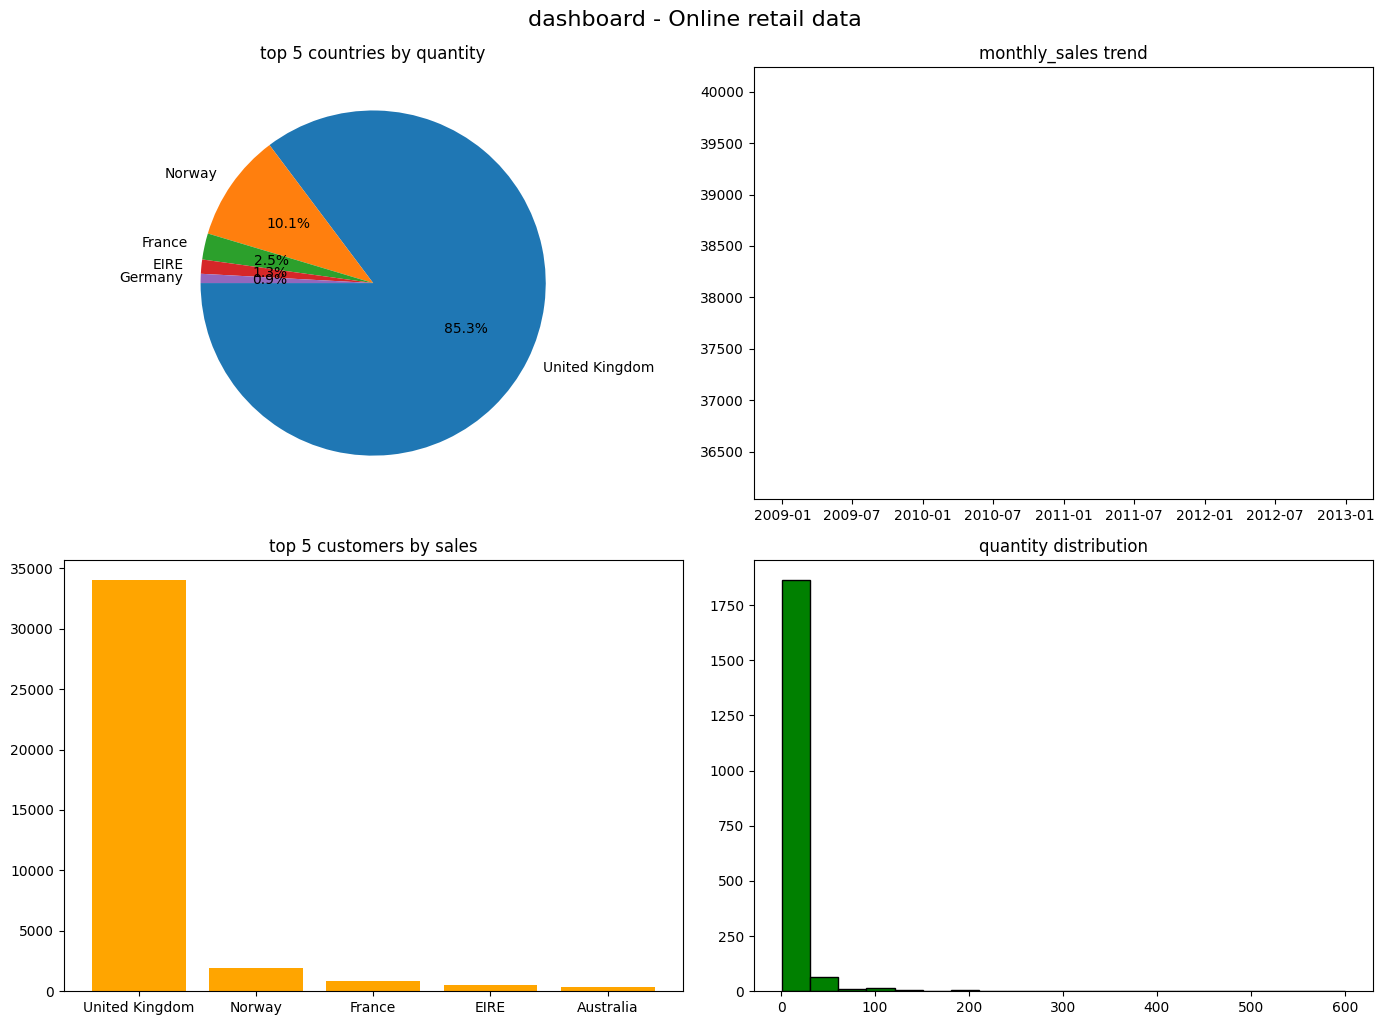

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel(r"C:\Users\Dakshith\Downloads\Online Retail.xlsx", nrows=2000)
df.columns = df.columns.str.strip().str.replace(" "," ").str.lower()

df= df.dropna(subset=['invoicedate','quantity','unitprice'])
df = df[(df['quantity']>0) & (df['unitprice']>0)]

df['invoicedate'] = pd.to_datetime(df['invoicedate'])


df['sales'] = df['quantity'] * df['unitprice']



fig,axs = plt.subplots(2,2,figsize=(14,10))

top_countries = df.groupby('country')['quantity'].sum().sort_values(ascending=False).head(5)
axs[0,0].pie(top_countries,labels=top_countries.index,autopct='%1.1f%%',startangle=180)
axs[0,0].set_title("top 5 countries by quantity")

monthly_sales=df.set_index('invoicedate')['sales'].resample('ME').sum()
axs[0,1].plot(monthly_sales.index,monthly_sales.values,color='darkgreen')
axs[0,1].set_title("monthly_sales trend")



top_customers = df.groupby('country')['sales'].sum().sort_values(ascending=False).head(5) 
axs[1,0].bar(top_customers.index,top_customers.values,color='orange')
axs[1,0].set_title("top 5 customers by sales")


axs[1,1].hist(df['quantity'],bins=20,color='green',edgecolor='black')
axs[1,1].set_title("quantity distribution")

plt.tight_layout()
plt.suptitle("dashboard - Online retail data",fontsize=16, y=1.02)
plt.show()